In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')
sns.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False   
plt.rcParams['axes.spines.right'] = False

pd.set_option('display.float_format', lambda x:'%.3f' % x)

In [39]:
df = pd.read_csv('./Plane Price.csv')
df.shape

(517, 16)

In [40]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.000,46.000,36,450,900.000,1300.000,"2,050","1,180",25/3,37/5,370,1300000.000
1,7 CCM Champ,Piston,85,89,83.000,44.000,15,600,720.000,800.000,"1,350",820,20/7,36/1,190,1230000.000
2,100 Darter (S.L. Industries),Piston,90,90,78.000,37.000,19,650,475.000,850.000,"1,300",810,21/5,35/0,210,1600000.000
3,7 AC Champ,Piston,85,88,78.000,37.000,19,620,500.000,850.000,"1,300",800,21/5,35/0,210,1300000.000
4,100 Darter (S.L. Industries),Piston,65,83,74.000,33.000,14,370,632.000,885.000,"1,220",740,21/5,35/0,175,1250000.000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [42]:
df.isnull().all()

Model Name                 False
Engine Type                False
HP or lbs thr ea engine    False
Max speed Knots            False
Rcmnd cruise Knots         False
Stall Knots dirty          False
Fuel gal/lbs               False
All eng rate of climb      False
Eng out rate of climb      False
Takeoff over 50ft          False
Landing over 50ft          False
Empty weight lbs           False
Length ft/in               False
Wing span ft/in            False
Range N.M.                 False
Price                      False
dtype: bool

#### Observations
1. Most of the columns have non-null values close to the total number of entries, suggesting that the dataset is relatively complete. However, some columns do have missing values:
    1. "Max speed Knots" has 20 missing values (497 non-null out of 517).
    2. "Rcmd cruise Knots" has 15 missing values (502 non-null out of 517).
    3. "All eng rate of climb" and "Eng out rate of climb" each have 4 missing values (513 non-null out of 517).
    4. "Takeoff over 50ft" has 25 missing values (492 non-null out of 517).
    5. "Range N.M." has 18 missing values (499 non-null out of 517).
    6. "Price" has 10 missing values (507 non-null out of 517).
2. The output of the df.isnull().all() command suggests that there is no single column where all rows are missing; every column contains some data.

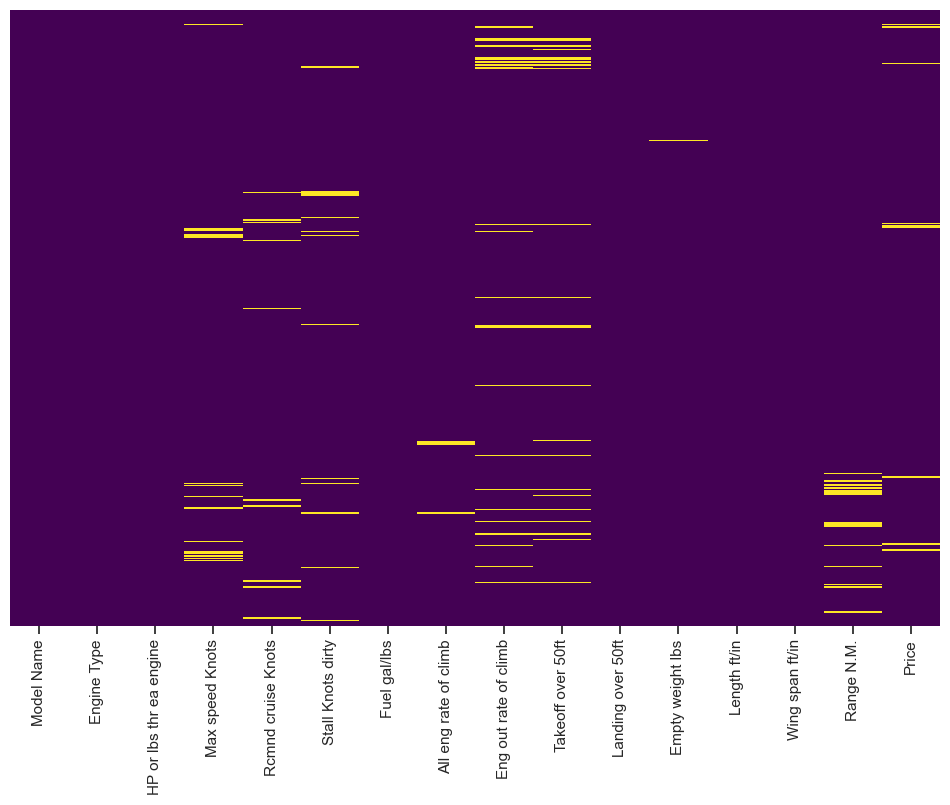

In [43]:
# Create a boolean DataFrame where True indicates a missing value
missing = df.isnull()

plt.figure(figsize=(12, 8))

# Draw a heatmap with the boolean values
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')

plt.show()

In [44]:
df = df.dropna()

In [45]:
df.shape

(421, 16)

In [46]:
columns_to_convert = ['HP or lbs thr ea engine', 'Max speed Knots', 'All eng rate of climb', 'Landing over 50ft', 'Empty weight lbs', 'Length ft/in', 'Wing span ft/in', 'Range N.M.']

for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').str.extract('(\d+)').astype(float)

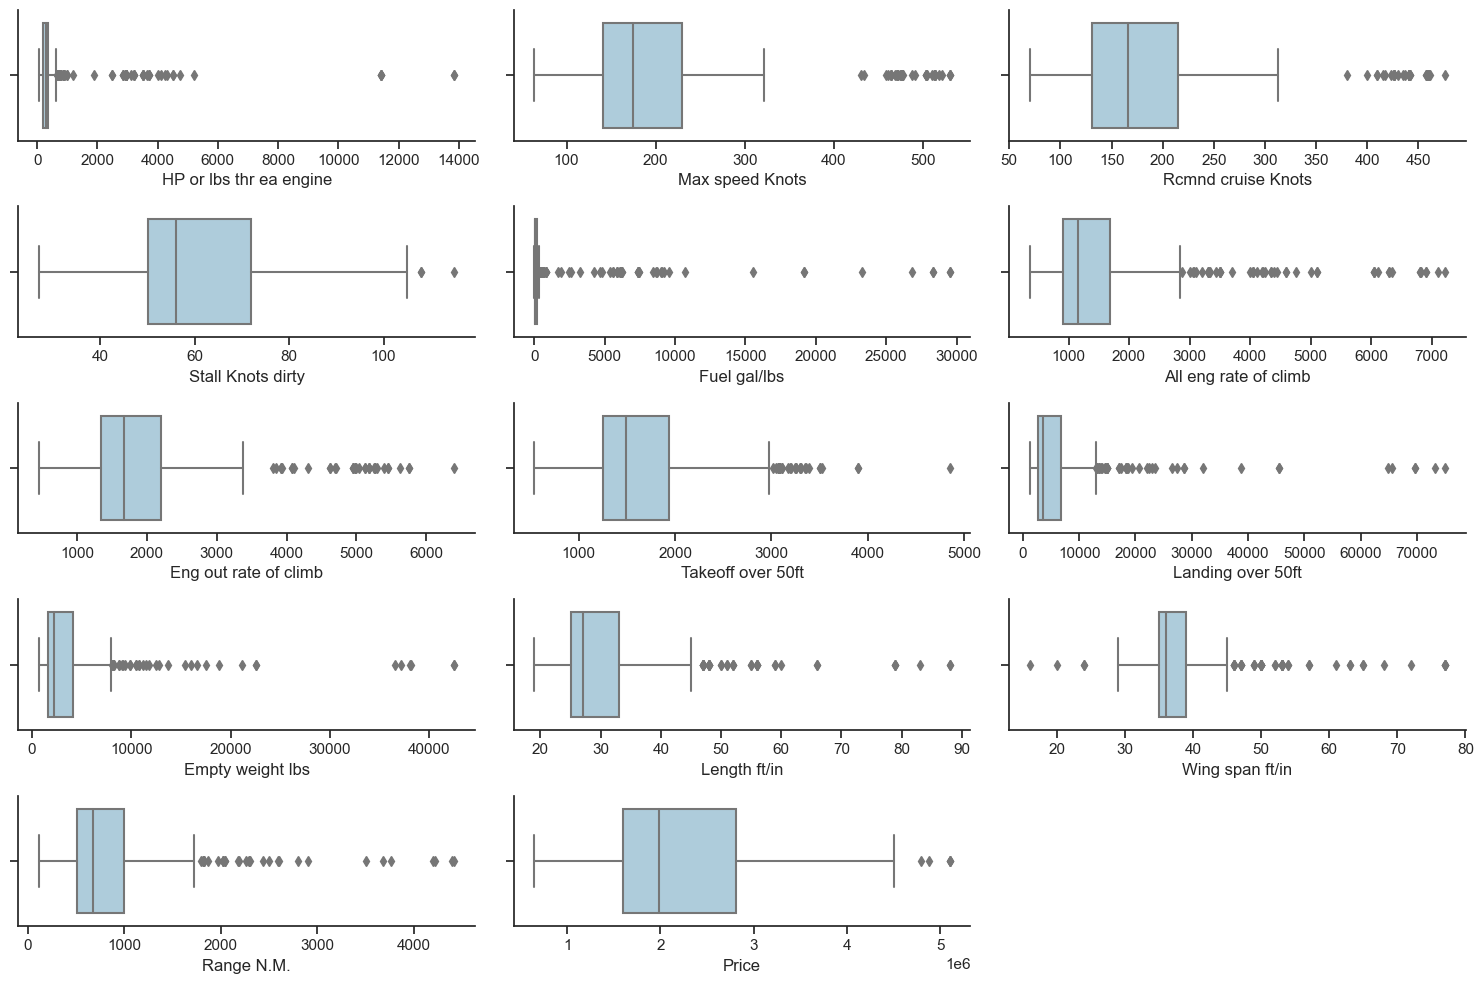

In [47]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))

# Loop through the numeric columns and create a box plot for each one
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns.columns) // 3 + 1, 3, i + 1)
    sns.boxplot(x=numeric_columns[column])

plt.tight_layout()
plt.show()

In [48]:
outlier_percentages = {}

# Calculate the percentage of outliers for each numeric column
for column in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for mild outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Calculate the percentage of outliers
    percent_outliers = (outliers.count() / df[column].count()) * 100
    outlier_percentages[column] = percent_outliers

# Print the percentage of outliers for each column
for column, percent_outliers in outlier_percentages.items():
    print(f"{column}: {percent_outliers:.2f}% outliers")

HP or lbs thr ea engine: 17.34% outliers
Max speed Knots: 10.21% outliers
Rcmnd cruise Knots: 10.93% outliers
Stall Knots dirty: 0.71% outliers
Fuel gal/lbs: 19.71% outliers
All eng rate of climb: 11.40% outliers
Eng out rate of climb: 8.55% outliers
Takeoff over 50ft: 6.65% outliers
Landing over 50ft: 10.69% outliers
Empty weight lbs: 8.79% outliers
Length ft/in: 9.03% outliers
Wing span ft/in: 12.35% outliers
Range N.M.: 7.36% outliers
Price: 1.19% outliers
